# Example of Supervise ML Model using Deep Neural networks to predict missing data

lets put a situation, we are in the middle of a exploratory well and density log acquisition has missing data in an important zones. A part from really robust methods that petrophysicists and rock physicists has to replicate values in missing zones, ML methods such deep neural network could help us to have another tool to get another method to get reliable values in missing zones.

Here I will use deep neural network but I encourage you to take a look in XGboost and Monte Carlo Chain regression models.

For this example I only use data of the same well to predict values in missing zones but you for sure could use all the data available in your field to get more robust models that could help you to obtain porosity information from other logs. Of course more data give us more reliable prediction.

In [0]:
import pandas as pd
import pandas as np

logs = pd.read_csv('2pred.csv')
import matplotlib.pyplot as plt

logs.head(3)

,DEPT,GR,Res,CALI,RHOB,NPHI,Real
0,2029.0,73.966,4.475,8.015,2.484,29.941,2.484
1,2029.5,73.843,4.089,7.955,2.474,30.397,2.474
2,2030.0,75.413,3.985,7.983,2.461,31.247,2.461


## Create your Tops to be plotted

In [0]:
tops = ('TOP-Member1','TOP-Member2','BASE')
tops_depths=(2041, 2420, 2602)

## Get a zone of your data

In [0]:
Zone = logs.copy() # in this case is an exactly copy but you can get a fraction of your data if you want.

In [0]:
logs_2pred = None # This will be necessary to initialize the plot

In [0]:
def Plot_data(top_depth,bottom_depth):
    
    f = Zone[(Zone.DEPT >= top_depth) & (Zone.DEPT <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,10), sharey=True)
    fig.suptitle("Density Prediction with Deep Neural Network ", fontsize=22)
    fig.subplots_adjust(top=0.80,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        for (i,j) in zip(tops_depths,tops):
            if ((i>=top_depth) and (i<=bottom_depth)):
                axes.axhline(y=i, linewidth=0.5, color='black')
                axes.text(0.1, i ,j, horizontalalignment='center',verticalalignment='center')
    #1st track: GR, CALI 
    
    ax01=ax[0].twiny()
    ax01.set_xlim(0,120)
    ax01.plot(logs.GR, logs.DEPT, label='GR[api]', color='green') 
    ax01.spines['top'].set_position(('outward',20))
    ax01.set_xlabel('GR[api]',color='green')    
    ax01.tick_params(axis='x', colors='green')
    ax01.grid(True)

    ax02=ax[0].twiny()
    ax02.set_xlim(8.5, 2)
    ax02.plot(logs.CALI, logs.DEPT, label='CALI', color='black', linewidth=0.3)
    ax02.spines['top'].set_position(('outward',60))
    ax02.set_xlabel('CALI[ft.]',color='black')
    ax02.fill_betweenx(logs.DEPT,logs.CALI,10,color='black',alpha=0.5) 

    #2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(0.1,50)
    ax11.set_xscale('linear')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',20))
    ax11.set_xlabel('Res[m.ohm]', color='blue')
    ax11.plot(logs.Res, logs.DEPT, label='Res[m.ohm]', color='blue')
    ax11.tick_params(axis='x', colors='blue')  
  
    #3th track: NPHI 

    ax21=ax[2].twiny()
    ax21.set_xlim(-10, 50)
    ax21.plot(f.NPHI, f.DEPT ,label='RHOB[g/cc]', color='gray', linewidth=0.8)
    ax21.grid(True) 
    ax21.spines['top'].set_position(('outward',20))
    ax21.set_xlabel('Neutron',color='gray')
    ax21.tick_params(axis='x', colors='gray')

    #4th track: RHOB, Real Density, Prediction

    ax31=ax[3].twiny()
    ax31.set_xlim(1.95,2.95)
    ax31.plot(f.RHOB, f.DEPT , color='red', linewidth=4.5, alpha=0.5)
    ax31.grid(True) 
    ax31.spines['top'].set_position(('outward',20))
    ax31.set_xlabel('RHOB[g/cc]',color='red')
    ax31.tick_params(axis='x', colors='red')
    ax31.fill_betweenx(logs.DEPT, 0, 3, where = f.RHOB.isnull() ,color='lime',alpha=0.5, label='missing')
    ax31.legend(loc='upper right')   


    if logs_2pred is not None:

          ax32=ax[3].twiny()
          ax32.set_xlim(1.95,2.95)                 
          ax32.plot(f.Real, f.DEPT ,label='Real Den[g/cc]', color='black', dashes=[8,3], linewidth=0.3)
          ax32.grid(True) 
          ax32.spines['top'].set_position(('outward',20))
          ax32.tick_params(axis='x', colors='red')
          ax32.legend(loc='lower right')  

          ax33=ax[3].twiny()
          ax33.set_xlim(1.95,2.95)
          ax33.scatter(logs_2pred.Prediction, logs_2pred.DEPT ,label='Prediction[g/cc]', color='blue', s=0.5)
          ax33.grid(True) 
          ax33.spines['top'].set_position(('outward',60))
          ax33.set_xlabel('Prediction[g/cc]',color='blue')
          ax33.tick_params(axis='x', colors='blue')

    plt.savefig ('Well.png', dpi=200, format='png')


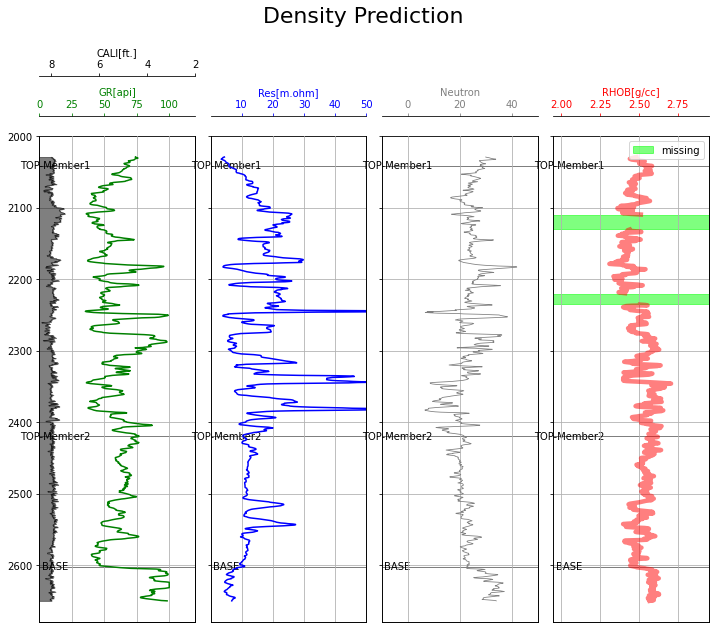

In [0]:
Plot_data(2000, 2680)

# Filter the data without the rows, where RHOB values is missing

In [0]:
logs_filter = logs[(logs.DEPT >= 2041) & (logs.DEPT <= 2420)] # first for the model only will use date from the TOP-Member1 to TOP-Member2

# Then filter the previous filter wihtout missing data
logs_filter = logs_filter.dropna()

# Lets make a correlation plot

### As you can see this figure allow us to plot all correlation amongst all variables

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


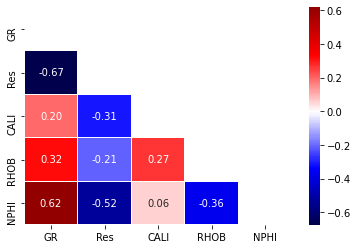

In [0]:
import numpy as np
import seaborn as sns

df = logs_filter.drop(columns=['DEPT','Real'])
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
_ = sns.heatmap(corr,mask=mask,cmap='seismic', center=0,
                linewidths=0.1,annot=True, fmt='.2f')


# Feature processing

### Neural networks work better with low values, so feature engineering is the first step, for this example Manual normalization will be used. You can try with other like Standard normalization and so on.

In [0]:
logs_filter['GR_SS'] = ((110 - logs_filter.GR) / (110 - 30))
logs_filter['Res_SS'] = ((50 - logs_filter.Res) / (50 - 0))
logs_filter['NPHI_SS'] = ((40 - logs_filter.NPHI) / (40 - 0))

logs_filter.describe()

# from sklearn.preprocessing import StandardScaler

# SS = StandardScaler()
# logs_filter['GR_SS'] = SS.fit_transform(logs_filter[['GR']])
# logs_filter['Res_SS'] = SS.fit_transform(logs_filter[['Res']])
# logs_filter['NPHI_SS'] = SS.fit_transform(logs_filter[['NPHI']])

,DEPT,GR,Res,CALI,RHOB,NPHI,Real,GR_SS,Res_SS,NPHI_SS
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,2237.229985,58.018961,16.556447,7.969349,2.497608,22.878051,2.497608,0.649763,0.668871,0.428049
std,111.804668,14.372992,9.029247,0.133293,0.078622,5.830640,0.078622,0.179662,0.180585,0.145766
min,2041.000000,35.391000,3.979000,7.442000,2.310000,6.495000,2.310000,0.133750,-0.165060,-0.047950
25%,2147.250000,47.590000,10.523500,7.913000,2.430000,20.116500,2.430000,0.557450,0.600490,0.345750
50%,2248.500000,55.267000,15.264000,7.982000,2.491000,23.455000,2.491000,0.684163,0.694720,0.413625
75%,2334.250000,65.404000,19.975500,8.039000,2.565000,26.170000,2.565000,0.780125,0.789530,0.497087
max,2420.000000,99.300000,58.253000,8.415000,2.706000,41.918000,2.706000,0.932613,0.920420,0.837625


# Make our X and y data for Train_Test_Split operation

In [0]:
X = logs_filter[['GR_SS', 'Res_SS', 'NPHI_SS']]
y = logs_filter[['RHOB']]
# X = logs_filter.iloc[:,7:10]
# y = logs_filter.iloc[:,4]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

# Make the Deep Neural Network Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import metrics

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(20, input_shape=(3,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(Adam(lr=0.01), loss='mean_squared_error', metrics =[metrics.mae])

In [0]:
model.summary() # to check your whole model until running

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________


## Good advice is running your model as variable called history in this example, which allow us later to get all the accuracies values for each epoch

In [0]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, batch_size=15, shuffle=True)

Train on 618 samples, validate on 69 samples
Epoch 1/50
618/618 [==============================] - 0s 264us/step - loss: 0.7625 - mean_absolute_error: 0.5941 - val_loss: 0.0591 - val_mean_absolute_error: 0.2169
Epoch 2/50
618/618 [==============================] - 0s 90us/step - loss: 0.0306 - mean_absolute_error: 0.1328 - val_loss: 0.0290 - val_mean_absolute_error: 0.1283
Epoch 3/50
618/618 [==============================] - 0s 82us/step - loss: 0.0236 - mean_absolute_error: 0.1159 - val_loss: 0.0209 - val_mean_absolute_error: 0.1034
Epoch 4/50
618/618 [==============================] - 0s 89us/step - loss: 0.0177 - mean_absolute_error: 0.1009 - val_loss: 0.0150 - val_mean_absolute_error: 0.0915
Epoch 5/50
618/618 [==============================] - 0s 87us/step - loss: 0.0127 - mean_absolute_error: 0.0856 - val_loss: 0.0113 - val_mean_absolute_error: 0.0823
Epoch 6/50
618/618 [==============================] - 0s 91us/step - loss: 0.0101 - mean_absolute_error: 0.0770 - val_loss: 0.007

## Plot the mean absolute error & loss values over the epochs


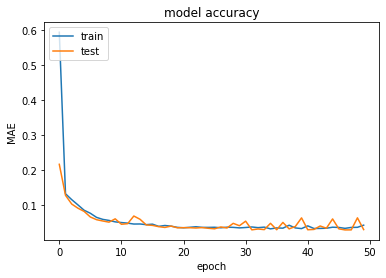

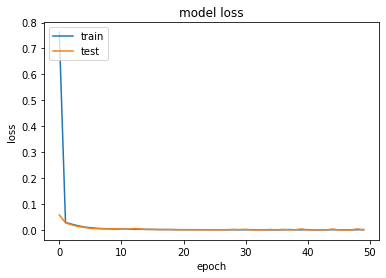

In [0]:
# summarize history for accuracy in the whole model
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss in the whole model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Lets check the prediction of the Model

### In this case a logs_2pred DataFrame in created which is GR, Res & NPHI values where the RHOB is missing

In [0]:
logs_2pred = logs[logs.RHOB.isnull()]
logs_2pred.head(2)

,DEPT,GR,Res,CALI,RHOB,NPHI,Real
162,2110.0,38.033,25.642,7.643,NaN,18.828,2.512
163,2110.5,38.028,25.599,7.642,NaN,21.243,2.504


### Before to get a prediction remember the data must to be normalized

In [0]:
logs_2pred['GR_SS'] = ((110 - logs_2pred.GR) / (110 - 30))
logs_2pred['Res_SS'] = ((50 - logs_2pred.Res) / (50 - 0))
logs_2pred['NPHI_SS'] = ((40 - logs_2pred.NPHI) / (40 - 0))

logs_2pred.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,DEPT,GR,Res,CALI,RHOB,NPHI,Real,GR_SS,Res_SS,NPHI_SS
162,2110.0,38.033,25.642,7.643,NaN,18.828,2.512,0.899587,0.48716,0.529300
163,2110.5,38.028,25.599,7.642,NaN,21.243,2.504,0.899650,0.48802,0.468925


### Filter the X_2pred with only GR, Res and NPHI values

In [0]:
X_2pred = logs_2pred[['GR_SS', 'Res_SS', 'NPHI_SS']]
X_2pred.shape

(72, 3)

In [0]:
prediction = model.predict(X_2pred) # you only need to call model.predict to get a prediction
prediction.shape

(72, 1)

In [0]:
logs_2pred['Prediction'] = prediction # create a column 'Prediction' with the array predcition previous created
logs_2pred.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DEPT,GR,Res,CALI,RHOB,NPHI,Real,GR_SS,Res_SS,NPHI_SS,Prediction
162,2110.0,38.033,25.642,7.643,NaN,18.828,2.512,0.899587,0.48716,0.529300,2.47524
163,2110.5,38.028,25.599,7.642,NaN,21.243,2.504,0.899650,0.48802,0.468925,2.43834


# A little talk!!

I think this is the most import message that I want to share with you, you can use this template to make any supervise regression prediction that you could need, for example: ROP(rate of perforation) from other perforation parameters even in oil, mining, hydrology and so on. Elements from types of rock or even alteration.

This will be unimaginable but you can use figures, shapes, sounds and so on to get a numerical prediction is so fantastic all the alternatives that ML could give us.

# Well check our predictions in the intentionally missing zone that I created for teaching purpose in this example:

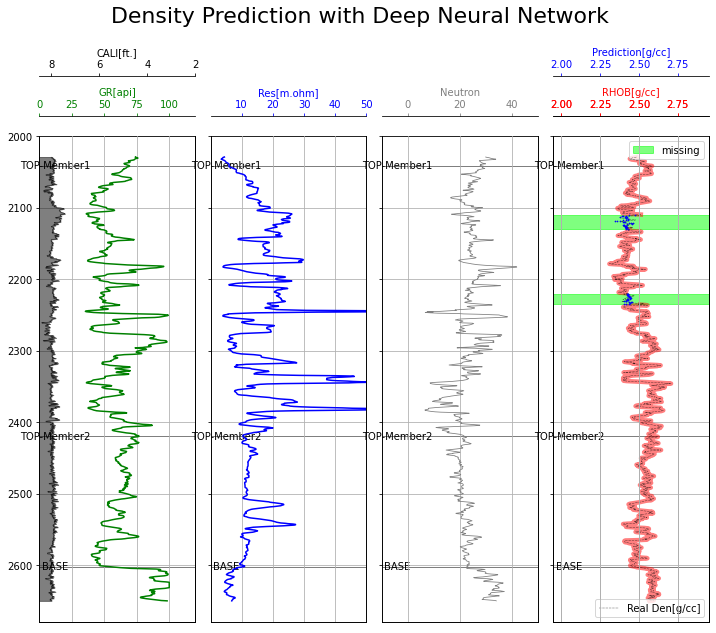

In [0]:
Plot_data(2000, 2680)